As part of a data exploration exercise, our team scraped the expenditure data of Uttar Pradesh government for 4 financial years. You can find the year-wise CSVs here. From the data, filter out expenditure related to only school education. 

1. Calculate the share of expenditure on school education incurred by various departments/ministries. 
2. Estimate the share of capital expenditure.
3. Using projected population for each of the years under consideration, estimate the 
   per-capita expenditure on school education in the state, and each district. 
4. Rank the districts based on utilization of allotted funds of revenue expenditure and 
   capital expenditure (separately). 


#### Column Header	Description


Division Code	4 digit unique code for the 18 "divisions" in Uttar Pradesh
Division Description	Name of the division

Treasury Code	2 digit unique code for each treasury
Treasury	Name of the treasury

Grant Number	Unique code to identify each "demand for grant"
Grant Head Description	Description of the demand for grant

Major Head Code	Head of account
Major Head Description	Description of the head of account

Scheme Code	Unique code to identify a specific scheme
Scheme Code Description	Description of the scheme

Standard Object Code	Unique code to identify a specific type of expenditure
Standard Object Description	Description of the standard object

Plan / Non-Plan	Whether the expenditure is Plan / Non-Plan

Voted / Charged	Whether the expenditure is Voted or Charged

fiscal_year	Financial Year

Progressive Allotment	Total amount in ₹ allotted to the treasury during the financial year

Actual Progressive Expenditure upto month (February)	Total amount of expenditure till February of the financial year

Provisional Current Month Expenditure(March)	Provisional expenditure in the month of March

Total Expenditure Upto Month (March)	Total amount of expenditure in the financial year

% A/E	Utilisation of allotted funds 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('district_level_mapping_2017.csv')


C:\Users\RASHMI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
# df1= pd.read_csv('district_level_mapping_2018.csv')
# df2= pd.read_csv('district_level_mapping_2019.csv')
# df3= pd.read_csv('district_level_mapping_2020.csv')
# df_concatenated= pd.concat([df, df1, df2, df3],ignore_index=True, axis=0)

#We can concatnate all files and do all the analaysis together or concatnate in end

### 1. Understanding the dataframe

In [4]:
df.shape

(375136, 20)

In [5]:
df.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
0,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,1,वेतन,N,V,2017-2018,6018883.0,5438225.0,0,5438225.0,90.35
1,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,3,मंहगाई भत्ता,N,V,2017-2018,150000.0,344832.0,0,344832.0,229.89
2,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,4,यात्रा व्यय,N,V,2017-2018,35000.0,17045.0,0,17045.0,48.70
3,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,5,स्थानान्तरण यात्रा व्यय,N,V,2017-2018,16949.0,0.0,0,0.0,0.00
4,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,6,अन्य भत्ते,N,V,2017-2018,250000.0,336648.0,0,336648.0,134.66


In [6]:
df.tail()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
375131,800.0,AGRA,88.0,KANSHI RAM NAGAR,REC,-,55,पुलिस,55008000900,अवितरित वेतन की जमा धनराशि,0,-,N,C,2017-2018,0.0,65497.0,0,65497.0,0.0
375132,4300.0,LUCKNOW COLL.,43.0,LUCKNOW COLL.,REC,-,55,पुलिस,55008000900,अवितरित वेतन की जमा धनराशि,0,-,N,V,2017-2018,0.0,5205.0,0,5205.0,0.0
375133,2200.0,ALLAHABAD,53.0,PRATAPGARH,REC,-,55,पुलिस,55008000900,अवितरित वेतन की जमा धनराशि,0,-,N,V,2017-2018,0.0,106775.0,0,106775.0,0.0
375134,1400.0,MORADABAD,17.0,RAMPUR,REC,-,55,पुलिस,55008000900,अवितरित वेतन की जमा धनराशि,0,-,N,V,2017-2018,0.0,53753.0,0,53753.0,0.0
375135,800.0,AGRA,68.0,FIROZABAD,REC,-,55,पुलिस,55008001000,अध्यासियों से विद्युत कटौती के रूप में वसूली ज...,0,-,N,V,2017-2018,0.0,10663.0,0,10663.0,0.0


#### Observations: 

    1. We observe that the column "Grant Number" which has to be a numeric column has REC in end.
    2. "Grant Head Description" column has "-" in the end of the column which seems to be 
    descriptive column.
   

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375136 entries, 0 to 375135
Data columns (total 20 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Division Code                                        374488 non-null  float64
 1   Division Description                                 374488 non-null  object 
 2   Treasury Code                                        374488 non-null  float64
 3   Treasury                                             375136 non-null  object 
 4   Grant Number                                         375136 non-null  object 
 5   Grant Head Description                               375136 non-null  object 
 6   Major Head Code                                      375136 non-null  int64  
 7   Major Head Description                               372904 non-null  object 
 8   Scheme Code                                          3

In [7]:
df.columns

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Grant Head Description', 'Major Head Code',
       'Major Head Description', 'Scheme Code', 'Scheme Code Description',
       'Standard Object Code', 'Standard Object Description',
       'Plan / Non-Plan', 'Voted / Charged', 'fiscal_year',
       'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E'],
      dtype='object')

In [8]:
df.dtypes

Division Code                                          float64
Division Description                                    object
Treasury Code                                          float64
Treasury                                                object
Grant Number                                            object
Grant Head Description                                  object
Major Head Code                                          int64
Major Head Description                                  object
Scheme Code                                              int64
Scheme Code Description                                 object
Standard Object Code                                     int64
Standard Object Description                             object
Plan / Non-Plan                                         object
Voted / Charged                                         object
fiscal_year                                             object
Progressive Allotment                                  

### 2. Filtering the data accroding to expenditure on school education and then performing EDA

In [9]:
df['Grant Head Description'].unique()  #departments demanding for grant

array(['आबकारी विभाग', 'आवास विभाग',
       'उद्योग विभाग (लघु उद्योग एवं निर्यात प्रोत्साहन)',
       'उद्योग विभाग (खानें और खनिज)',
       'उद्योग विभाग (खादी एवं ग्रामोद्योग)',
       'उद्योग विभाग (हथकरघा उद्योग)',
       'उद्योग विभाग (भारी एवं मध्यम उद्योग)',
       'उद्योग विभाग (मुद्रण तथा लेखन सामग्री )', 'ऊर्जा विभाग',
       'कृषि तथा अन्य सम्बद्ध विभाग (औद्यानिक एवं रेशम विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (कृषि)',
       'कृषि तथा अन्य सम्बद्ध विभाग (भूमि विकास एवं जल संसाधन)',
       'कृषि तथा अन्य सम्बद्ध विभाग (ग्राम्य विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (पंचायती राज)',
       'कृषि तथा अन्य सम्बद्ध विभाग ((पशुधन)',
       'कृषि तथा अन्य सम्बद्ध विभाग (दुग्धशाला विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (मत्स्य)',
       'कृषि तथा अन्य सम्बद्ध विभाग (सहकारिता)',
       'कार्मिक विभाग (प्रशिक्षण तथा अन्य व्यय)',
       'कार्मिक विभाग (लोक सेवा आयोग )', 'खाद्य तथा रसद विभाग',
       'खेल विभाग', 'गन्ना विकास विभाग (गन्ना)',
       'गन्ना विकास विभाग 

In [8]:
df[df['Grant Head Description']==  'शिक्षा विभाग (प्राथमिक शिक्षा)']

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
297430,800.0,AGRA,6.0,ALIGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,42000000.0,39002700.0,0,39002700.0,92.86
297431,2200.0,ALLAHABAD,64.0,ALLAHABAD II,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,17050000.0,13379551.0,0,13379551.0,78.47
297432,4900.0,FAIZABAD,74.0,AMBEDKARNAGAR,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,72948000.0,69626602.0,0,69626602.0,95.45
297433,2000.0,KANPUR NAGAR,81.0,AURAIYA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,33000000.0,4108542.0,0,4108542.0,12.45
297434,3400.0,AZAMGARH,34.0,AZAMGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,315594240.0,13827215.0,0,13827215.0,4.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302233,4900.0,FAIZABAD,52.0,SULTANPUR,71,शिक्षा विभाग (प्राथमिक शिक्षा),4202,NaN,4202012010500,बेसिक शिक्षा परिषद द्वारा संचालित उच्च प्राथमि...,24,वृहत् निर्माण कार्य,N,V,2017-2018,6244000.0,6244000.0,0,6244000.0,100.00
302234,2800.0,MIRZAPUR,69.0,TRY.SONBHADRA,71,शिक्षा विभाग (प्राथमिक शिक्षा),4202,NaN,4202012010500,बेसिक शिक्षा परिषद द्वारा संचालित उच्च प्राथमि...,24,वृहत् निर्माण कार्य,N,V,2017-2018,7805000.0,7805000.0,0,7805000.0,100.00
302235,4300.0,LUCKNOW COLL.,44.0,UNNAO TREASURY,71,शिक्षा विभाग (प्राथमिक शिक्षा),4202,NaN,4202012010500,बेसिक शिक्षा परिषद द्वारा संचालित उच्च प्राथमि...,24,वृहत् निर्माण कार्य,N,V,2017-2018,7805000.0,0.0,0,0.0,0.00
302236,2700.0,VARANASI,27.0,VARANASI,71,शिक्षा विभाग (प्राथमिक शिक्षा),4202,NaN,4202012010500,बेसिक शिक्षा परिषद द्वारा संचालित उच्च प्राथमि...,24,वृहत् निर्माण कार्य,N,V,2017-2018,8585500.0,8585500.0,0,8585500.0,100.00


In [9]:
df[df['Grant Head Description']== 'शिक्षा विभाग (माध्यमिक शिक्षा)']

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
302238,4300.0,LUCKNOW COLL.,43.0,LUCKNOW COLL.,72,शिक्षा विभाग (माध्यमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011090300,सैनिक स्कूल लखनऊ के कर्मचारियों को पेंशन का भु...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,23300000.0,23300000.0,0,23300000.0,100.00
302239,800.0,AGRA,8.0,AGRA,72,शिक्षा विभाग (माध्यमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,राज्य सरकार द्वारा अनुदानित माध्यमिक विद्यालयो...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,50500000.0,49310926.0,0,49310926.0,97.65
302240,800.0,AGRA,6.0,ALIGARH,72,शिक्षा विभाग (माध्यमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,राज्य सरकार द्वारा अनुदानित माध्यमिक विद्यालयो...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,33182723.0,33182723.0,0,33182723.0,100.00
302241,2200.0,ALLAHABAD,22.0,ALLAHABAD,72,शिक्षा विभाग (माध्यमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,राज्य सरकार द्वारा अनुदानित माध्यमिक विद्यालयो...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,91080000.0,89583569.0,0,89583569.0,98.36
302242,4900.0,FAIZABAD,74.0,AMBEDKARNAGAR,72,शिक्षा विभाग (माध्यमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,राज्य सरकार द्वारा अनुदानित माध्यमिक विद्यालयो...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,36660000.0,36660000.0,0,36660000.0,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312883,4300.0,LUCKNOW COLL.,60.0,LUCKNOW-JB,72,शिक्षा विभाग (माध्यमिक शिक्षा),4202,NaN,4202012021800,ई-बुक्स का क्रय / ई- लाइब्रेरी की स्थापना,47,कम्प्यूटर अनुरक्षण/तत्सम्बन्धी स्टेशनरी का क्रय,N,V,2017-2018,917000.0,917000.0,0,917000.0,100.00
312884,4300.0,LUCKNOW COLL.,89.0,CSMAHARAJ NAGAR,72,शिक्षा विभाग (माध्यमिक शिक्षा),4202,NaN,4202012022700,नये सैनिक स्कूलों की स्थापना,24,वृहत् निर्माण कार्य,N,V,2017-2018,132244000.0,132244000.0,0,132244000.0,100.00
312885,2300.0,JHANSI-MAIN,23.0,JHANSI-MAIN,72,शिक्षा विभाग (माध्यमिक शिक्षा),4202,NaN,4202012022700,नये सैनिक स्कूलों की स्थापना,24,वृहत् निर्माण कार्य,N,V,2017-2018,67756000.0,67756000.0,0,67756000.0,100.00
312886,800.0,AGRA,9.0,MAINPURI,72,शिक्षा विभाग (माध्यमिक शिक्षा),4202,NaN,4202012022700,नये सैनिक स्कूलों की स्थापना,24,वृहत् निर्माण कार्य,N,V,2017-2018,100000000.0,100000000.0,0,100000000.0,100.00


In [10]:
 df[df['Grant Head Description']=='शिक्षा विभाग (उच्च शिक्षा)']

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
312888,1100.0,BAREILLY,11.0,BAREILLY,73,शिक्षा विभाग (उच्च शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170400,राज्य के विश्वविद्यालयों के शिक्षकों / शिक्षणे...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,9021950.0,9021950.0,0,9021950.0,100.00
312889,2300.0,JHANSI-MAIN,23.0,JHANSI-MAIN,73,शिक्षा विभाग (उच्च शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170400,राज्य के विश्वविद्यालयों के शिक्षकों / शिक्षणे...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,4172268.0,0.0,0,0.0,0.00
312890,2200.0,ALLAHABAD,64.0,ALLAHABAD II,73,शिक्षा विभाग (उच्च शिक्षा),2202,सामान्य शिक्षा,2202030010300,उच्च शिक्षा निदेशालय,1,वेतन,N,V,2017-2018,68094000.0,55792677.0,0,55792677.0,81.93
312891,2200.0,ALLAHABAD,64.0,ALLAHABAD II,73,शिक्षा विभाग (उच्च शिक्षा),2202,सामान्य शिक्षा,2202030010300,उच्च शिक्षा निदेशालय,2,मजदूरी,N,V,2017-2018,600000.0,600000.0,0,600000.0,100.00
312892,2200.0,ALLAHABAD,64.0,ALLAHABAD II,73,शिक्षा विभाग (उच्च शिक्षा),2202,सामान्य शिक्षा,2202030010300,उच्च शिक्षा निदेशालय,3,मंहगाई भत्ता,N,V,2017-2018,4086000.0,8584062.0,0,8584062.0,210.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314619,1100.0,BAREILLY,15.0,SHAHJAHANPUR,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,99949.0,0,99949.0,99.95
314620,3300.0,BASTI,67.0,SIDDHARTH NAGAR,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,0.0,0,0.0,0.00
314621,4300.0,LUCKNOW COLL.,46.0,SITAPUR,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,99797.0,0,99797.0,99.80
314622,2800.0,MIRZAPUR,69.0,TRY.SONBHADRA,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,100000.0,0,100000.0,100.00


In [5]:

df_elementry= df[df['Grant Head Description']== 'शिक्षा विभाग (माध्यमिक शिक्षा)']

df_primary = df[df['Grant Head Description']==  'शिक्षा विभाग (प्राथमिक शिक्षा)']

df_higher= df[df['Grant Head Description']=='शिक्षा विभाग (उच्च शिक्षा)']


In [8]:
df_primary.shape

(4808, 20)

In [9]:
df_elementry.shape

(10650, 20)

In [10]:
df_higher.shape

(1736, 20)

### 3. New dataframe from filtered data 

In [11]:
school_education = pd.concat([df_primary, df_elementry, df_higher],ignore_index=True, axis=0)

In [12]:
school_education.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
0,800.0,AGRA,6.0,ALIGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,42000000.0,39002700.0,0,39002700.0,92.86
1,2200.0,ALLAHABAD,64.0,ALLAHABAD II,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,17050000.0,13379551.0,0,13379551.0,78.47
2,4900.0,FAIZABAD,74.0,AMBEDKARNAGAR,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,72948000.0,69626602.0,0,69626602.0,95.45
3,2000.0,KANPUR NAGAR,81.0,AURAIYA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,33000000.0,4108542.0,0,4108542.0,12.45
4,3400.0,AZAMGARH,34.0,AZAMGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,315594240.0,13827215.0,0,13827215.0,4.38


In [13]:
school_education.tail()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
17189,1100.0,BAREILLY,15.0,SHAHJAHANPUR,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,99949.0,0,99949.0,99.95
17190,3300.0,BASTI,67.0,SIDDHARTH NAGAR,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,0.0,0,0.0,0.00
17191,4300.0,LUCKNOW COLL.,46.0,SITAPUR,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,99797.0,0,99797.0,99.80
17192,2800.0,MIRZAPUR,69.0,TRY.SONBHADRA,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,100000.0,100000.0,0,100000.0,100.00
17193,2700.0,VARANASI,27.0,VARANASI,73,शिक्षा विभाग (उच्च शिक्षा),4202,NaN,4202012033300,राजकीय उपाधि महाविद्यालय,25,लघु निर्माण कार्य,N,V,2017-2018,200000.0,195600.0,0,195600.0,97.80


In [14]:
school_education.dtypes

Division Code                                          float64
Division Description                                    object
Treasury Code                                          float64
Treasury                                                object
Grant Number                                            object
Grant Head Description                                  object
Major Head Code                                          int64
Major Head Description                                  object
Scheme Code                                              int64
Scheme Code Description                                 object
Standard Object Code                                     int64
Standard Object Description                             object
Plan / Non-Plan                                         object
Voted / Charged                                         object
fiscal_year                                             object
Progressive Allotment                                  

In [ ]:
#grant number wrongly marked as object datatype
#There are some null values present in column Major Head Description

### 4. Imputing the null values

In [15]:
school_education.isnull().sum()

#There are 330 null entries present in Major Head Description 
#Let us look at the Major head code- to identify these null heads

Division Code                                            0
Division Description                                     0
Treasury Code                                            0
Treasury                                                 0
Grant Number                                             0
Grant Head Description                                   0
Major Head Code                                          0
Major Head Description                                 330
Scheme Code                                              0
Scheme Code Description                                  0
Standard Object Code                                     0
Standard Object Description                              0
Plan / Non-Plan                                          0
Voted / Charged                                          0
fiscal_year                                              0
Progressive Allotment                                    0
Actual Progressive Expenditure upto month (October)     

In [19]:
school_education['Major Head Code'].value_counts()

2202    14481
2204     1234
2205     1019
4202      330
2071      130
Name: Major Head Code, dtype: int64

In [16]:
school_education['Major Head Description'].unique()

array(['पेंशन तथा अन्य सेवा निवृत्ति हित लाभ', 'सामान्य शिक्षा',
       'खेल कूद तथा युवा सेवायें', nan, 'कला एवं संस्कृति'], dtype=object)

In [21]:
school_education[school_education['Major Head Description'].isnull()== True].shape

#only one entry in major head code has value count as 330

(330, 20)

In [22]:
school_education[school_education['Major Head Description'].isnull()== True].head(2)

#let us look at the null data, It seems all the null entries belong to one major head

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
302086,800.0,AGRA,8.0,AGRA,71,शिक्षा विभाग (प्राथमिक शिक्षा),4202,NaN,4202012010101,सर्व शिक्षा अभियान के अन्तर्गत प्राथमिक एवं उच...,24,वृहत् निर्माण कार्य,N,V,2017-2018,23442383.0,23442383.0,0,23442383.0,100.0
302087,800.0,AGRA,6.0,ALIGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),4202,NaN,4202012010101,सर्व शिक्षा अभियान के अन्तर्गत प्राथमिक एवं उच...,24,वृहत् निर्माण कार्य,N,V,2017-2018,22151332.0,22151332.0,0,22151332.0,100.0


In [17]:
# imputation of errors
#4202 major code that has 330 null entries
# in major head Description belongs to the capital outlay on education sports art and culture 

school_education['Major Head Description'].fillna('शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय', inplace=True)

In [18]:
school_education['Major Head Description'].unique()   #sucessfully imputed the null values

array(['पेंशन तथा अन्य सेवा निवृत्ति हित लाभ', 'सामान्य शिक्षा',
       'खेल कूद तथा युवा सेवायें',
       'शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय',
       'कला एवं संस्कृति'], dtype=object)

### 5. Checking Duplicated Rows

In [19]:
school_education.duplicated().sum()

4985

In [20]:
school_education[school_education.duplicated()== True]

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
3666,4300.0,LUCKNOW COLL.,43.0,LUCKNOW COLL.,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011110101,वेतनादि से भिन्न मदें (के.60/रा.40-के.+रा.),20,सहायता अनुदान -सामान्य (गैर वेतन),N,V,2017-2018,9.274362e+09,9.274362e+09,0,9.274362e+09,100.0
3667,4300.0,LUCKNOW COLL.,43.0,LUCKNOW COLL.,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011110101,वेतनादि से भिन्न मदें (के.60/रा.40-के.+रा.),20,सहायता अनुदान -सामान्य (गैर वेतन),N,V,2017-2018,9.274362e+09,9.274362e+09,0,9.274362e+09,100.0
3668,4300.0,LUCKNOW COLL.,43.0,LUCKNOW COLL.,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011110101,वेतनादि से भिन्न मदें (के.60/रा.40-के.+रा.),20,सहायता अनुदान -सामान्य (गैर वेतन),N,V,2017-2018,9.274362e+09,9.274362e+09,0,9.274362e+09,100.0
3669,4300.0,LUCKNOW COLL.,43.0,LUCKNOW COLL.,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011110101,वेतनादि से भिन्न मदें (के.60/रा.40-के.+रा.),20,सहायता अनुदान -सामान्य (गैर वेतन),N,V,2017-2018,9.274362e+09,9.274362e+09,0,9.274362e+09,100.0
3670,4300.0,LUCKNOW COLL.,43.0,LUCKNOW COLL.,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011110101,वेतनादि से भिन्न मदें (के.60/रा.40-के.+रा.),20,सहायता अनुदान -सामान्य (गैर वेतन),N,V,2017-2018,9.274362e+09,9.274362e+09,0,9.274362e+09,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17136,4300.0,LUCKNOW COLL.,60.0,LUCKNOW-JB,73,शिक्षा विभाग (उच्च शिक्षा),4202,शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय,4202012030203,राज्य विश्वविद्यालयो में आधारभूत सुविधाएं उपलब...,24,वृहत् निर्माण कार्य,N,V,2017-2018,4.044854e+08,4.044854e+08,0,4.044854e+08,100.0
17137,4300.0,LUCKNOW COLL.,60.0,LUCKNOW-JB,73,शिक्षा विभाग (उच्च शिक्षा),4202,शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय,4202012030203,राज्य विश्वविद्यालयो में आधारभूत सुविधाएं उपलब...,24,वृहत् निर्माण कार्य,N,V,2017-2018,4.044854e+08,4.044854e+08,0,4.044854e+08,100.0
17138,4300.0,LUCKNOW COLL.,60.0,LUCKNOW-JB,73,शिक्षा विभाग (उच्च शिक्षा),4202,शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय,4202012030203,राज्य विश्वविद्यालयो में आधारभूत सुविधाएं उपलब...,24,वृहत् निर्माण कार्य,N,V,2017-2018,4.044854e+08,4.044854e+08,0,4.044854e+08,100.0
17139,4300.0,LUCKNOW COLL.,60.0,LUCKNOW-JB,73,शिक्षा विभाग (उच्च शिक्षा),4202,शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय,4202012030203,राज्य विश्वविद्यालयो में आधारभूत सुविधाएं उपलब...,24,वृहत् निर्माण कार्य,N,V,2017-2018,4.044854e+08,4.044854e+08,0,4.044854e+08,100.0


In [21]:
#We can consider dropping these rows as in one fiscal year we cannot have expenditure from 
#the same major head for the exact same purpose with the same amount. 
#Hence, dropping would be a good decision

school_education.drop_duplicates(inplace=True)

In [22]:
school_education.duplicated().sum() #dropped the duplicates sucessfully

0

### 6. Bad Data or Wrongly marked datatype

In [23]:
school_education.info()

#grant number has been wrongly marked as object though it is a int.
#We suspect some missing or bad data here or there can also be wrong labeling of datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12209 entries, 0 to 17193
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Division Code                                        12209 non-null  float64
 1   Division Description                                 12209 non-null  object 
 2   Treasury Code                                        12209 non-null  float64
 3   Treasury                                             12209 non-null  object 
 4   Grant Number                                         12209 non-null  object 
 5   Grant Head Description                               12209 non-null  object 
 6   Major Head Code                                      12209 non-null  int64  
 7   Major Head Description                               12209 non-null  object 
 8   Scheme Code                                          12209 non-nul

In [24]:
school_education['Grant Number'].value_counts()

#There is no bad data. It has been wrongly marked as object. 

72    6196
71    4328
73    1685
Name: Grant Number, dtype: int64

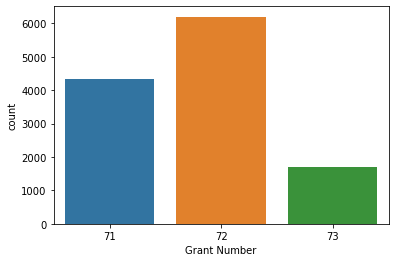

In [35]:
sns.countplot(school_education['Grant Number']);

In [25]:
school_education['Grant Number']= school_education['Grant Number'].astype('int64')

In [37]:
school_education['Grant Number'].dtypes #succesfully changed datatype

dtype('int64')

### 7. Understanding Other Numerical and Categorical columns 

In [26]:
school_education.columns

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Grant Head Description', 'Major Head Code',
       'Major Head Description', 'Scheme Code', 'Scheme Code Description',
       'Standard Object Code', 'Standard Object Description',
       'Plan / Non-Plan', 'Voted / Charged', 'fiscal_year',
       'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E'],
      dtype='object')

In [119]:
school_education[['Progressive Allotment', 'Actual Progressive Expenditure upto month (October)','Provisional Current Month Expenditure(November)','Total Expenditure Upto Month (November)','% A/E' ]].describe().T

,count,mean,std,min,25%,50%,75%,max
Progressive Allotment,12209.0,3.937377e+07,4.732591e+08,-40000000.0,1500.0,27000.00,852000.0,3.701705e+10
Actual Progressive Expenditure upto month (October),12209.0,4.088078e+07,5.719461e+08,0.0,0.0,25908.00,785710.0,3.701705e+10
Provisional Current Month Expenditure(November),12209.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.0,0.000000e+00
Total Expenditure Upto Month (November),12209.0,4.088078e+07,5.719461e+08,0.0,0.0,25908.00,785710.0,3.701705e+10
% A/E,12209.0,9.348992e+01,4.589554e+02,0.0,0.0,98.58,100.0,2.954930e+04


In [27]:
school_education['Provisional Current Month Expenditure(November)'].mean()

#we can drop this column as it is of no use. Since it has all zeros in it 

0.0

In [ ]:
# school_education.drop(['Provisional Current Month Expenditure(November)'], axis=1, inplace=True)
# We would have run this column if this we might not require to concatenate other 
#dataframes. We are suspecting other dataframes might be having some values in this column. 

In [28]:
school_education['Progressive Allotment'].describe()

count    1.220900e+04
mean     3.937377e+07
std      4.732591e+08
min     -4.000000e+07
25%      1.500000e+03
50%      2.700000e+04
75%      8.520000e+05
max      3.701705e+10
Name: Progressive Allotment, dtype: float64

#### Observations

    3. We an spot negative value as minimum in the description of this column. 
      Let us understand this.

Skewness and Histplot

In [236]:
school_education.columns

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Grant Head Description', 'Major Head Code',
       'Major Head Description', 'Scheme Code', 'Scheme Code Description',
       'Standard Object Code', 'Standard Object Description',
       'Plan / Non-Plan', 'Voted / Charged', 'fiscal_year',
       'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E', 'Population'],
      dtype='object')

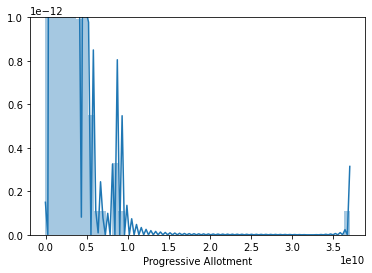

In [40]:
sns.distplot(school_education['Progressive Allotment']);


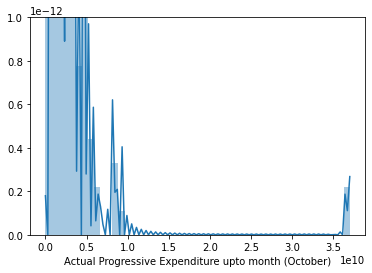

In [239]:
sns.distplot(school_education['Actual Progressive Expenditure upto month (October)']);


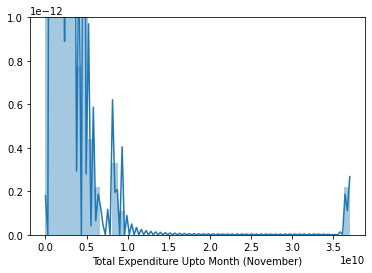

In [241]:
sns.distplot(school_education['Total Expenditure Upto Month (November)']);


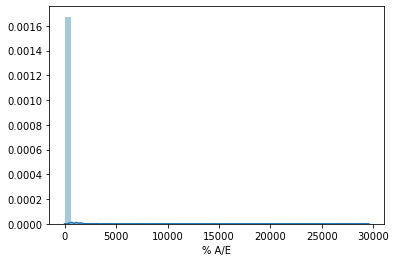

In [242]:
sns.distplot(school_education['% A/E']);


### Observations:

    4. All the numerical variable is right skewed. There are negative entries present in 
       the dataframe in one column as well.
       We will replace these entries by 0.

In [42]:
school_education[school_education['Progressive Allotment']<0]

# print(school_education[school_education['Progressive Allotment']<0].shape)

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
298840,3400.0,AZAMGARH,66.0,MAU,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011010300,राजकीय प्राथमिक विद्यालय,52,पुनरीक्षित वेतन का अवशेष (राजकीय),N,V,2017-2018,-83300.0,0.0,0,0.0,0.0
298933,2200.0,ALLAHABAD,22.0,ALLAHABAD,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020300,उत्तर प्रदेश बेसिक शिक्षा परिषद द्वारा संचालित...,20,सहायता अनुदान -सामान्य (गैर वेतन),N,V,2017-2018,-16832279.0,0.0,0,0.0,0.0
299162,2200.0,ALLAHABAD,64.0,ALLAHABAD II,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-35000000.0,0.0,0,0.0,0.0
299164,4900.0,FAIZABAD,74.0,AMBEDKARNAGAR,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-27500000.0,0.0,0,0.0,0.0
299168,1100.0,BAREILLY,13.0,BADAUN,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-9000000.0,0.0,0,0.0,0.0
299181,1100.0,BAREILLY,11.0,BAREILLY,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-7000000.0,0.0,0,0.0,0.0
299191,2700.0,VARANASI,77.0,CHANDAULI,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-8000000.0,0.0,0,0.0,0.0
299196,3200.0,GORAKHPUR,35.0,DEORIA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-14500000.0,0.0,0,0.0,0.0
299202,2000.0,KANPUR NAGAR,18.0,FARRUKHABAD,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-16000000.0,0.0,0,0.0,0.0
299211,2700.0,VARANASI,30.0,GHAZIPUR,71,शिक्षा विभाग (प्राथमिक शिक्षा),2202,सामान्य शिक्षा,2202011020702,सहाय़ता प्राप्त जू.हा.स्कूल एवं के.जी. नर्सरी ...,53,पुनरीक्षित वेतन का अवशेष (राज्य सहायता),N,V,2017-2018,-20000000.0,0.0,0,0.0,0.0


In [29]:
school_education['Progressive Allotment']=np.where(school_education['Progressive Allotment']<0,0,school_education['Progressive Allotment'])


In [30]:
school_education[school_education['Progressive Allotment']<0] #removed negative values

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E



N    0.993447
P    0.006553
Name: Plan / Non-Plan, dtype: float64


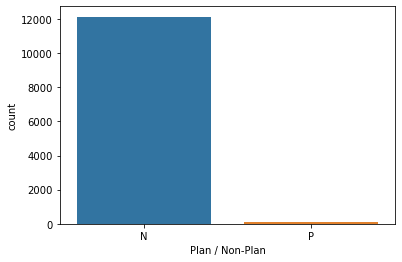

In [28]:
#categorical variable

sns.countplot(school_education['Plan / Non-Plan'])
print('')
print(school_education['Plan / Non-Plan'].value_counts(normalize=True))


#seems very astonishing only 0.6 percent expenditure was planned 


V    1.0
Name: Voted / Charged, dtype: float64


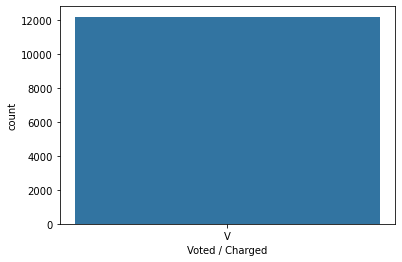

In [29]:
#categorical variable

sns.countplot(school_education['Voted / Charged'])
print('')
print(school_education['Voted / Charged'].value_counts(normalize=True))


#We might not need this column later on beacuse all of them are voted.

### 8. Outliers

In [31]:
#Checking the outliers
schooledu_data_new = school_education[['Progressive Allotment', 'Actual Progressive Expenditure upto month (October)','Total Expenditure Upto Month (November)','% A/E' ]]

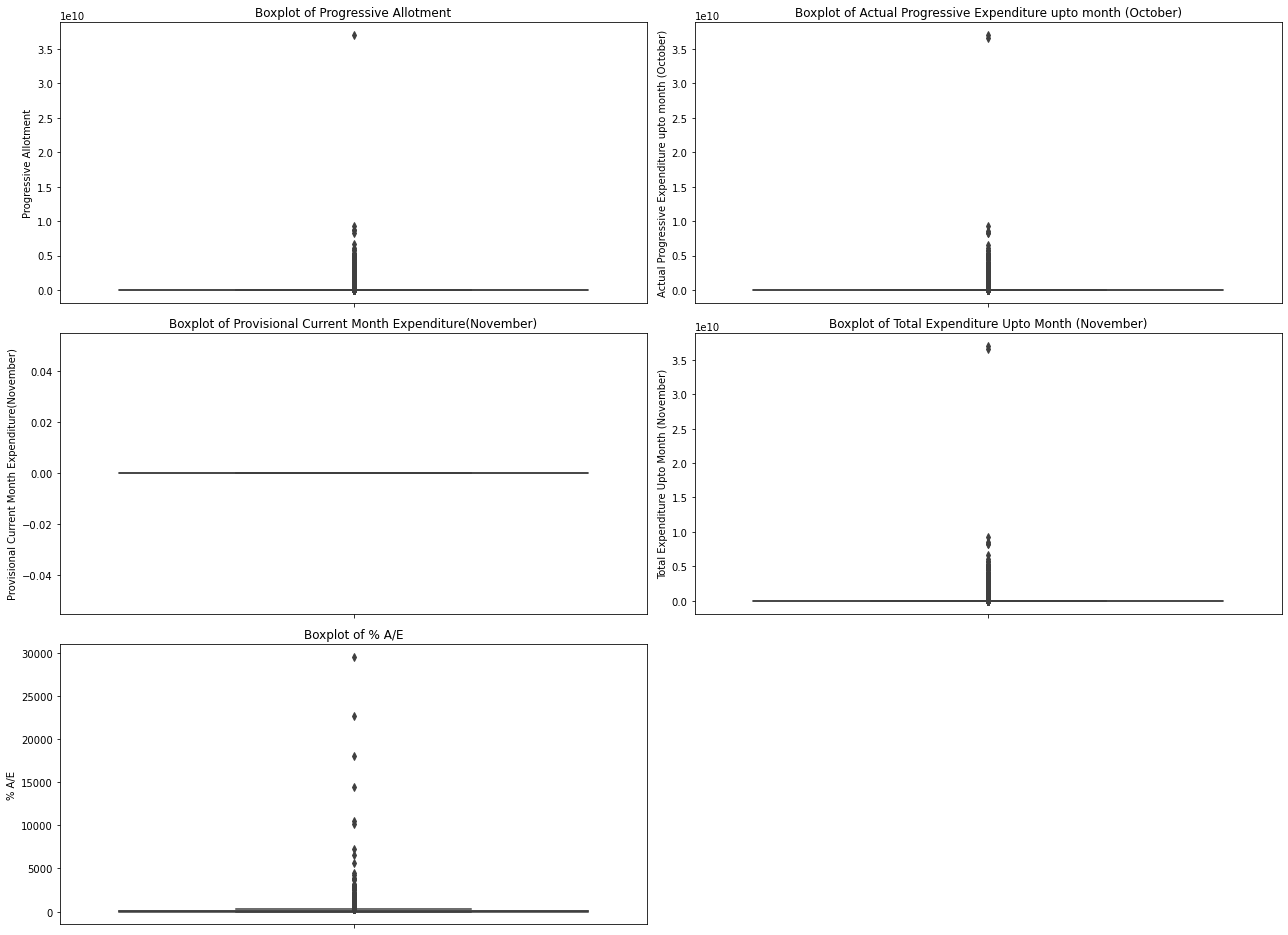

In [67]:
#Let's check outliers
plt.figure (figsize=(18,26))
feature_list = schooledu_data_new.columns
for i in range (len(feature_list)):
    plt.subplot(6,2,i+1)
    sns.boxplot( y = schooledu_data_new[feature_list[i]], data = schooledu_data_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#We will not be treating outliers for this dataframe as it might lose some of the features. 
#All the columns have outliers in it

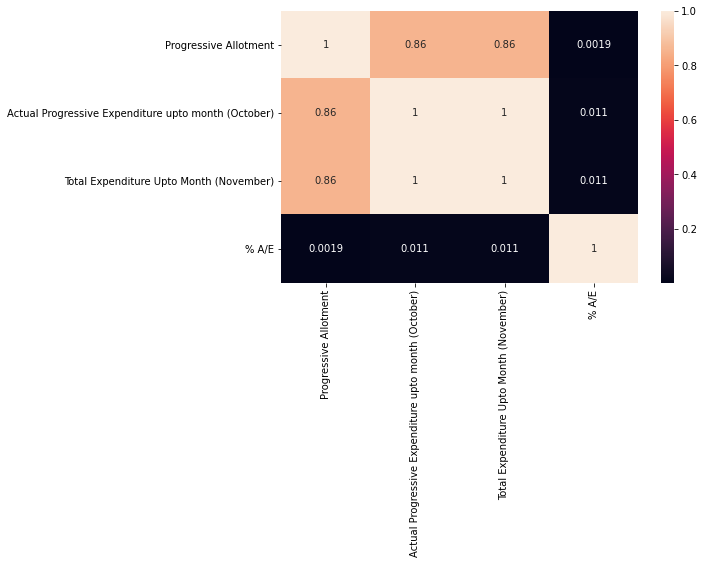

In [77]:
plt.figure (figsize=(8,5))
sns.heatmap(schooledu_data_new.corr(), annot=True)
plt.show();

# There is high positive correlation (0.86) between Total Expenditure Upto 
# Month (November) and Progressive Allotment. 
# Higher the allotment refers to higher total expenditure. 

1. Calculate the share of expenditure on school education incurred by various departments/ministries. 
2. Estimate the share of capital expenditure.
3. Using projected population for each of the years under consideration, estimate the 
   per-capita expenditure on school education in the state, and each district. 
4. Rank the districts based on utilization of allotted funds of revenue expenditure and 
   capital expenditure (separately). 

#### 1. Calculate the share of expenditure on school education incurred by various departments/ministries.  

In [32]:
school_education.head(2)


,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
0,800.0,AGRA,6.0,ALIGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,42000000.0,39002700.0,0,39002700.0,92.86
1,2200.0,ALLAHABAD,64.0,ALLAHABAD II,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,17050000.0,13379551.0,0,13379551.0,78.47


In [91]:
pd.DataFrame(school_education['Total Expenditure Upto Month (November)'].groupby(school_education['Grant Head Description']).sum())

,Total Expenditure Upto Month (November)
Grant Head Description,
शिक्षा विभाग (उच्च शिक्षा),2.128282e+10
शिक्षा विभाग (प्राथमिक शिक्षा),3.934039e+11
शिक्षा विभाग (माध्यमिक शिक्षा),8.442678e+10


In [107]:
pd.DataFrame(school_education['Total Expenditure Upto Month (November)'].groupby(school_education['Grant Head Description']).sum())

#### 2. Estimate the share of capital expenditure.

In [93]:
school_education['Major Head Description'].unique()

array(['पेंशन तथा अन्य सेवा निवृत्ति हित लाभ', 'सामान्य शिक्षा',
       'खेल कूद तथा युवा सेवायें',
       'शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय',
       'कला एवं संस्कृति'], dtype=object)

In [123]:
school_education['Major Head Code'].value_counts()

2202    9553
2204    1234
2205    1019
4202     273
2071     130
Name: Major Head Code, dtype: int64

In [100]:
school_capital_expend= school_education[school_education['Major Head Description']=='शिक्षा खेल कला तथा संस्कृति पर पूंजीगत परिव्यय']

In [106]:
pd.DataFrame(school_capital_expend['Total Expenditure Upto Month (November)'].groupby(school_capital_expend['Grant Head Description']).sum())

,Total Expenditure Upto Month (November)
Grant Head Description,
शिक्षा विभाग (उच्च शिक्षा),1.784465e+09
शिक्षा विभाग (प्राथमिक शिक्षा),1.880974e+09
शिक्षा विभाग (माध्यमिक शिक्षा),1.222400e+09


#### 3. Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district. 

projected_population: 224571834

In [94]:
percapita_expenditure = school_education['Total Expenditure Upto Month (November)'].sum()/224571834
print('Per-capita expenditure on school education in the state in year 2017-18 is',percapita_expenditure)

Per-capita expenditure on school education in the state in year 2017-18 is 2222.5114175716267


In [175]:
school_education['Treasury'].unique()

array(['ALIGARH', 'ALLAHABAD II', 'AMBEDKARNAGAR', 'AURAIYA', 'AZAMGARH',
       'BADAUN', 'BAGHPAT SADAR', 'BAHRAICH', 'BALLIA', 'BALRAMPUR',
       'BARABANKI', 'BAREILLY', 'BASTI', 'BHADOHI', 'BIJNOR', 'CHANDAULI',
       'CHITRAKOOT', 'DEORIA', 'ETAWAH', 'FAIZABAD', 'FARRUKHABAD',
       'FATEHPUR', 'FIROZABAD', 'G.B.NAGAR', 'GHAZIPUR', 'GONDA',
       'GORAKHPUR', 'HARDOI', 'HATHRAS', 'J.P.NAGAR', 'JAUNPUR',
       'JHANSI-MAIN', 'KANPUR DEHAT', 'KANPUR NAGAR', 'KAUSHAMBI',
       'KUSHI NAGAR', 'LALITPUR', 'LUCKNOW COLL.', 'MAHOBA', 'MAINPURI',
       'MATHURA', 'MAU', 'MEERUT SADAR', 'MIRZAPUR', 'MORADABAD',
       'MUZAFFARNAGAR', 'ORAI', 'PRATAPGARH', 'RAEBARELI', 'RAMPUR',
       'SAHARANPUR', 'SANT KABIR NAGR', 'SHAHJAHANPUR', 'SHAMLI',
       'SIDDHARTH NAGAR', 'SRAWASTI', 'SULTANPUR', 'TRY.SONBHADRA',
       'UNNAO TREASURY', 'VARANASI', 'LUCKNOW-JB', 'AGRA', 'BANDA',
       'BULANDSHAHR', 'CSMAHARAJ NAGAR', 'ETAH', 'GHAZIABAD', 'HAPUR',
       'KANNAUJ', 'KANSHI RAM NAGAR

In [191]:
percapita_expenditure_dist=pd.DataFrame ({ 'Treasury':school_education['Treasury'].unique(),
                                         'Population': [3673889,5954391, 2397888, 1379545 ,4613913,
                                                         3681896,1303048,3487731 ,3239774, 2148665,
                                                         3260699,4448359,2464464,1578213,3682713,
                                                         1952756,991730,3100946, 1581810,2470996 ,
                                                         1885204,2632733, 2498156,1648115, 3620268, 
                                                         3433919, 4440895,4092845,1564708,1840221,
                                                         4494204 ,1998603,1796184,4581268,1599596,
                                                         3564544,1221592,4589838,875958,1868529,
                                                         2547184,2205968,3443689, 2496970,
                                                         4772006, 4143512,187137,3209141,
                                                         3405559,2335819,3466382,1715183,3006538,
                                                         1313650,2559297,1117361,3797117,
                                                         1862559,3108367,3676841,4589838,4418797,
                                                         1799410,3499171,5439171,1774480,
                                                         4681645,1338211,1656616,1436719,4021243,
                                                         2684703,2031007,1104285, 221334,
                                                         4483992, 1168385]})


In [206]:
# percapita_expenditure_dist
# percapita_expenditure_dist.drop(['index'],inplace=True,axis=1)
percapita_expenditure_dist=percapita_expenditure_dist.sort_values(by=['Treasury']) 

#data entered was different than how the values in treasury was appearing

In [207]:
# percapita_expenditure_dist.reset_index(inplace=True)
percapita_expenditure_dist

,Treasury,Population
0,AGRA,4418797
1,ALIGARH,3673889
2,ALLAHABAD,1168385
3,ALLAHABAD II,5954391
4,AMBEDKARNAGAR,2397888
...,...,...
72,SRAWASTI,1117361
73,SULTANPUR,3797117
74,TRY.SONBHADRA,1862559
75,UNNAO TREASURY,3108367


In [212]:
percapita_expenditure_dist.drop(['Treasury'],inplace=True,axis=1)

In [183]:
df_percapita= pd.DataFrame(school_education['Total Expenditure Upto Month (November)'].groupby(school_education['Treasury']).sum())
df_percapita.reset_index(inplace=True)

In [186]:
df_percapita

,Treasury,Total Expenditure Upto Month (November)
0,AGRA,8.699130e+09
1,ALIGARH,6.760725e+09
2,ALLAHABAD,3.881336e+09
3,ALLAHABAD II,1.246913e+10
4,AMBEDKARNAGAR,5.756474e+09
...,...,...
72,SRAWASTI,1.717533e+09
73,SULTANPUR,6.589428e+09
74,TRY.SONBHADRA,3.352737e+09
75,UNNAO TREASURY,6.734232e+09


In [219]:
df_percapita_district=pd.concat([df_percapita,percapita_expenditure_dist], axis=1)
df_percapita_district['Percapita Expenditure_district'] = percapita_expenditure = df_percapita_district['Total Expenditure Upto Month (November)']/df_percapita_district['Population']
# df_percapita_district

In [225]:
df_percapita_district

,Treasury,Total Expenditure Upto Month (November),Population,Percapita Expenditure_district
0,AGRA,8.699130e+09,4418797,1968.664849
1,ALIGARH,6.760725e+09,3673889,1840.209507
2,ALLAHABAD,3.881336e+09,1168385,3321.966764
3,ALLAHABAD II,1.246913e+10,5954391,2094.107484
4,AMBEDKARNAGAR,5.756474e+09,2397888,2400.643293
...,...,...,...,...
72,SRAWASTI,1.717533e+09,1117361,1537.133285
73,SULTANPUR,6.589428e+09,3797117,1735.376701
74,TRY.SONBHADRA,3.352737e+09,1862559,1800.070395
75,UNNAO TREASURY,6.734232e+09,3108367,2166.485473


#### 4. Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately). 

In [126]:
school_education['Treasury'].unique()

array(['ALIGARH', 'ALLAHABAD II', 'AMBEDKARNAGAR', 'AURAIYA', 'AZAMGARH',
       'BADAUN', 'BAGHPAT SADAR', 'BAHRAICH', 'BALLIA', 'BALRAMPUR',
       'BARABANKI', 'BAREILLY', 'BASTI', 'BHADOHI', 'BIJNOR', 'CHANDAULI',
       'CHITRAKOOT', 'DEORIA', 'ETAWAH', 'FAIZABAD', 'FARRUKHABAD',
       'FATEHPUR', 'FIROZABAD', 'G.B.NAGAR', 'GHAZIPUR', 'GONDA',
       'GORAKHPUR', 'HARDOI', 'HATHRAS', 'J.P.NAGAR', 'JAUNPUR',
       'JHANSI-MAIN', 'KANPUR DEHAT', 'KANPUR NAGAR', 'KAUSHAMBI',
       'KUSHI NAGAR', 'LALITPUR', 'LUCKNOW COLL.', 'MAHOBA', 'MAINPURI',
       'MATHURA', 'MAU', 'MEERUT SADAR', 'MIRZAPUR', 'MORADABAD',
       'MUZAFFARNAGAR', 'ORAI', 'PRATAPGARH', 'RAEBARELI', 'RAMPUR',
       'SAHARANPUR', 'SANT KABIR NAGR', 'SHAHJAHANPUR', 'SHAMLI',
       'SIDDHARTH NAGAR', 'SRAWASTI', 'SULTANPUR', 'TRY.SONBHADRA',
       'UNNAO TREASURY', 'VARANASI', 'LUCKNOW-JB', 'AGRA', 'BANDA',
       'BULANDSHAHR', 'CSMAHARAJ NAGAR', 'ETAH', 'GHAZIABAD', 'HAPUR',
       'KANNAUJ', 'KANSHI RAM NAGAR

In [ ]:
#seperating on the basis of capital and revenue expenditure

In [33]:
school_education_capitalexp= school_education[school_education['Major Head Code'] == 4202]

In [40]:
school_education_revenueexp= school_education.loc[school_education['Major Head Code'] != 4202]

#### for capital expenditure

In [69]:
d1= pd.DataFrame(school_education_capitalexp['Progressive Allotment'].groupby(school_education_capitalexp['Treasury']).sum())
d2= pd.DataFrame(school_education_capitalexp['Total Expenditure Upto Month (November)'].groupby(school_education_capitalexp['Treasury']).sum())
Utilization_funds = d3['Total Expenditure Upto Month (November)']/d3['Progressive Allotment']
d3['Utilization_funds']=Utilization_funds

In [ ]:
d3 = pd.concat([d1,d2],axis=0)

In [73]:
d3.sort_values(by= 'Utilization_funds', ascending=False)

,Progressive Allotment,Total Expenditure Upto Month (November),Utilization_funds
Treasury,,,
MORADABAD,2.550910e+07,2.550910e+07,1.000000
RAEBARELI,2.877134e+07,2.877134e+07,1.000000
KANPUR DEHAT,2.044523e+07,2.044523e+07,1.000000
LALITPUR,1.628322e+07,1.628322e+07,1.000000
MAHOBA,2.426493e+07,2.426493e+07,1.000000
...,...,...,...
UNNAO TREASURY,4.107549e+07,2.792805e+07,0.679920
HARDOI,4.671708e+07,3.132638e+07,0.670555
LUCKNOW-JB,2.432474e+09,1.600090e+09,0.657804


In [ ]:
#we can pass a nested single code as well

In [80]:
pd.DataFrame((school_education_capitalexp['Total Expenditure Upto Month (November)'].groupby(school_education_capitalexp['Treasury']).sum())/school_education_capitalexp['Progressive Allotment'].groupby(school_education_capitalexp['Treasury']).sum()).sort_values(by=0, ascending=False)

,0
Treasury,
MORADABAD,1.000000
RAEBARELI,1.000000
KANPUR DEHAT,1.000000
LALITPUR,1.000000
MAHOBA,1.000000
...,...
UNNAO TREASURY,0.679920
HARDOI,0.670555
LUCKNOW-JB,0.657804


#### for revenue expenditure

In [82]:
d4= pd.DataFrame(school_education_revenueexp['Progressive Allotment'].groupby(school_education_revenueexp['Treasury']).sum())
d5= pd.DataFrame(school_education_revenueexp['Total Expenditure Upto Month (November)'].groupby(school_education_revenueexp['Treasury']).sum())


In [87]:
d6= pd.concat([d4,d5],axis=1)

In [86]:
Utilization_funds = d6['Total Expenditure Upto Month (November)']/d6['Progressive Allotment']
d6['Utilization_funds']=Utilization_funds

In [89]:
d6.sort_values(by= 'Utilization_funds', ascending=False)

,Progressive Allotment,Total Expenditure Upto Month (November),Utilization_funds
Treasury,,,
LUCKNOW COLL.,5.709599e+10,8.967860e+10,1.570664
ALIGARH,6.744323e+09,6.730645e+09,0.997972
BADAUN,5.436308e+09,5.424977e+09,0.997916
HARDOI,7.923024e+09,7.893954e+09,0.996331
CSMAHARAJ NAGAR,3.379331e+09,3.363321e+09,0.995262
...,...,...,...
HAPUR,2.671137e+09,2.400706e+09,0.898758
SIDDHARTH NAGAR,5.251058e+09,4.690357e+09,0.893221
GHAZIABAD,4.058056e+09,3.550519e+09,0.874931


## Observations, Assumptions and Insights:



1. The education data belongs to primary,elementary and higher education departments. We observe that there were two columns in the dataframe that were of no use. 'Provisional Current Month Expenditure(November)' which had all the entries as zero and 'Voted / Charged' which had all the entries marked as 'V' suggesting voted.

2. More than fifty percent of the entries in the dataframe belongs to elementary education department having grant number 72. 

3. There were 330 null entries in column 'Major Head Description'. We replaced all the null values with capital outlay on education sports art and culture in description as when we checked the major head code for same null entries all of them were marked as 4202 (Major Head Code).

4. There were 4985 entries that were duplicate entries. We have dropped these entries but then again having 28.99 percent as duplicated is a matter of concern amongst which most of them belongs to elementary education department. (understanding Why?)

5. All the numerical variable columns are right skewed.  

6. There were 28 entries in column Progressive Allotment marked as some negative value. Since, allotment cannot be negative so we imputed those entries with zero. Marking them as zero will not influence our understanding of data since it is 0.2 percent of all the entries in column.

7. It was very astonishing to note that in column 'Plan / Non-Plan' expenditure almost 99.34 percent entries in this column belonged to Non-Plan expenditure.  

8. There were outliers present in 'Progressive Allotment','Actual Progressive Expenditure upto month (October)','Total Expenditure Upto Month (November)', '% A/E' - all the numerical columns. But we did not treat the outliers in this case because treating the outliers might have influenced the insights and lead to misinterpretation. 


9. There is high positive correlation (0.86) between Total Expenditure Upto Month (November) and Progressive Allotment. Higher the allotment refers to higher total expenditure. 

10. While it is surprising that Progressive Allotment, Actual Progressive Expenditure upto month (October)', and Total Expenditure Upto Month (November) is negatively related utilization of funds.

11. 'Actual Progressive Expenditure upto month (October)' and 'Total Expenditure Upto Month (November)' show perfect positive relation. We could have dropped one of these columns. 

12. A major part of the Total expenditure (8.442678e+10) for school education is incurred by Elementry education department. Even though total expenditure is high under the elementary education head but the larger share of capital expenditure is incurred by parimary education department followed by Higher education department.Per-capita expenditure on school education in the state Uttar Pradesh in year 2017-18 is 2222.51. Moradabad has ranked highest in utilization of total capital expenditure in education while for total revenue expenditure lucknow coll. stands out to be highest. 